In [1]:
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, patches
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from IPython.display import HTML, Image

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

In [2]:
from random import randint, shuffle


samples = 1000

def generate_random_values():
    return [randint(0,50) * randint(0,50) for _ in range(samples)]

ms = [2 for _ in range(samples)]
xs = generate_random_values()
# cs = generate_random_values()
cs = [50 for _ in range(samples)]

ys = []
for i in range(samples):
    y = ms[i] * xs[i] + cs[i]
    ys.append(y)
noise = [random.randint(0,100) for _ in range(samples)]

data = {
    "ms": ms,
    "xs": xs,
    "cs": cs,
    "noise": noise, 
    "ys": ys
}

df = pd.DataFrame(data=data)


In [3]:
test = df.head(5)
test

,ms,xs,cs,noise,ys
0,2,286,50,59,622
1,2,66,50,32,182
2,2,533,50,87,1116
3,2,1232,50,27,2514
4,2,490,50,95,1030


In [4]:
columns = ["ms", "xs", "cs", "noise"]
all_columns = columns + ["ys"]
X_train = df[columns]
y_train = df["ys"]

In [5]:
# data = df.values
# scaler = preprocessing.MinMaxScaler()
# scaled_data = scaler.fit_transform(data)
# scaled_df = pd.DataFrame(scaled_data, columns=all_columns)
# X_train = scaled_df[columns]
# y_train = scaled_df["ys"]
# X_train.head(5)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=[4]))
# model.add(tf.keras.layers.Dense(units=10, input_shape=[100]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
# opt = SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
opt = Adam(0.01)
model.compile(optimizer=opt, loss="mean_squared_error")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = {
    "loss": [],
    0: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    1: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    2: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    3: {
        0: [],
        1: [],
        2: [],
        3: []
    }, 
}

In [8]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(X_train, y_train, epochs=1)
    history["loss"].append(hist.history["loss"])
    all_weights = model.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1
32/32 [==============================] - 0s 6ms/step - loss: 4529224.0000
RUNNING EPOCH 2
32/32 [==============================] - 0s 5ms/step - loss: 1577815.6250
RUNNING EPOCH 3
32/32 [==============================] - 0s 5ms/step - loss: 361937.5312
RUNNING EPOCH 4
32/32 [==============================] - 0s 5ms/step - loss: 31878.2246
RUNNING EPOCH 5
32/32 [==============================] - 0s 5ms/step - loss: 8483.1924
RUNNING EPOCH 6
32/32 [==============================] - 0s 5ms/step - loss: 7158.7568
RUNNING EPOCH 7
32/32 [==============================] - 0s 5ms/step - loss: 6013.6758
RUNNING EPOCH 8
32/32 [==============================] - 0s 5ms/step - loss: 4987.4307
RUNNING EPOCH 9
32/32 [==============================] - 0s 5ms/step - loss: 4081.6147
RUNNING EPOCH 10
32/32 [==============================] - 0s 5ms/step - loss: 3287.5955
RUNNING EPOCH 11
32/32 [==============================] - 0s 5ms/step - loss: 2626.1323
RUNNING EPOCH 12
32/32 [========

In [9]:
test["result"] = model.predict(test[columns])
test

1/1 [==============================] - 0s 50ms/step


<ipython-input-9-a54c478e00da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["result"] = model.predict(test[columns])


,ms,xs,cs,noise,ys,result
0,2,286,50,59,622,621.987610
1,2,66,50,32,182,181.993408
2,2,533,50,87,1116,1115.981201
3,2,1232,50,27,2514,2513.961426
4,2,490,50,95,1030,1029.982422


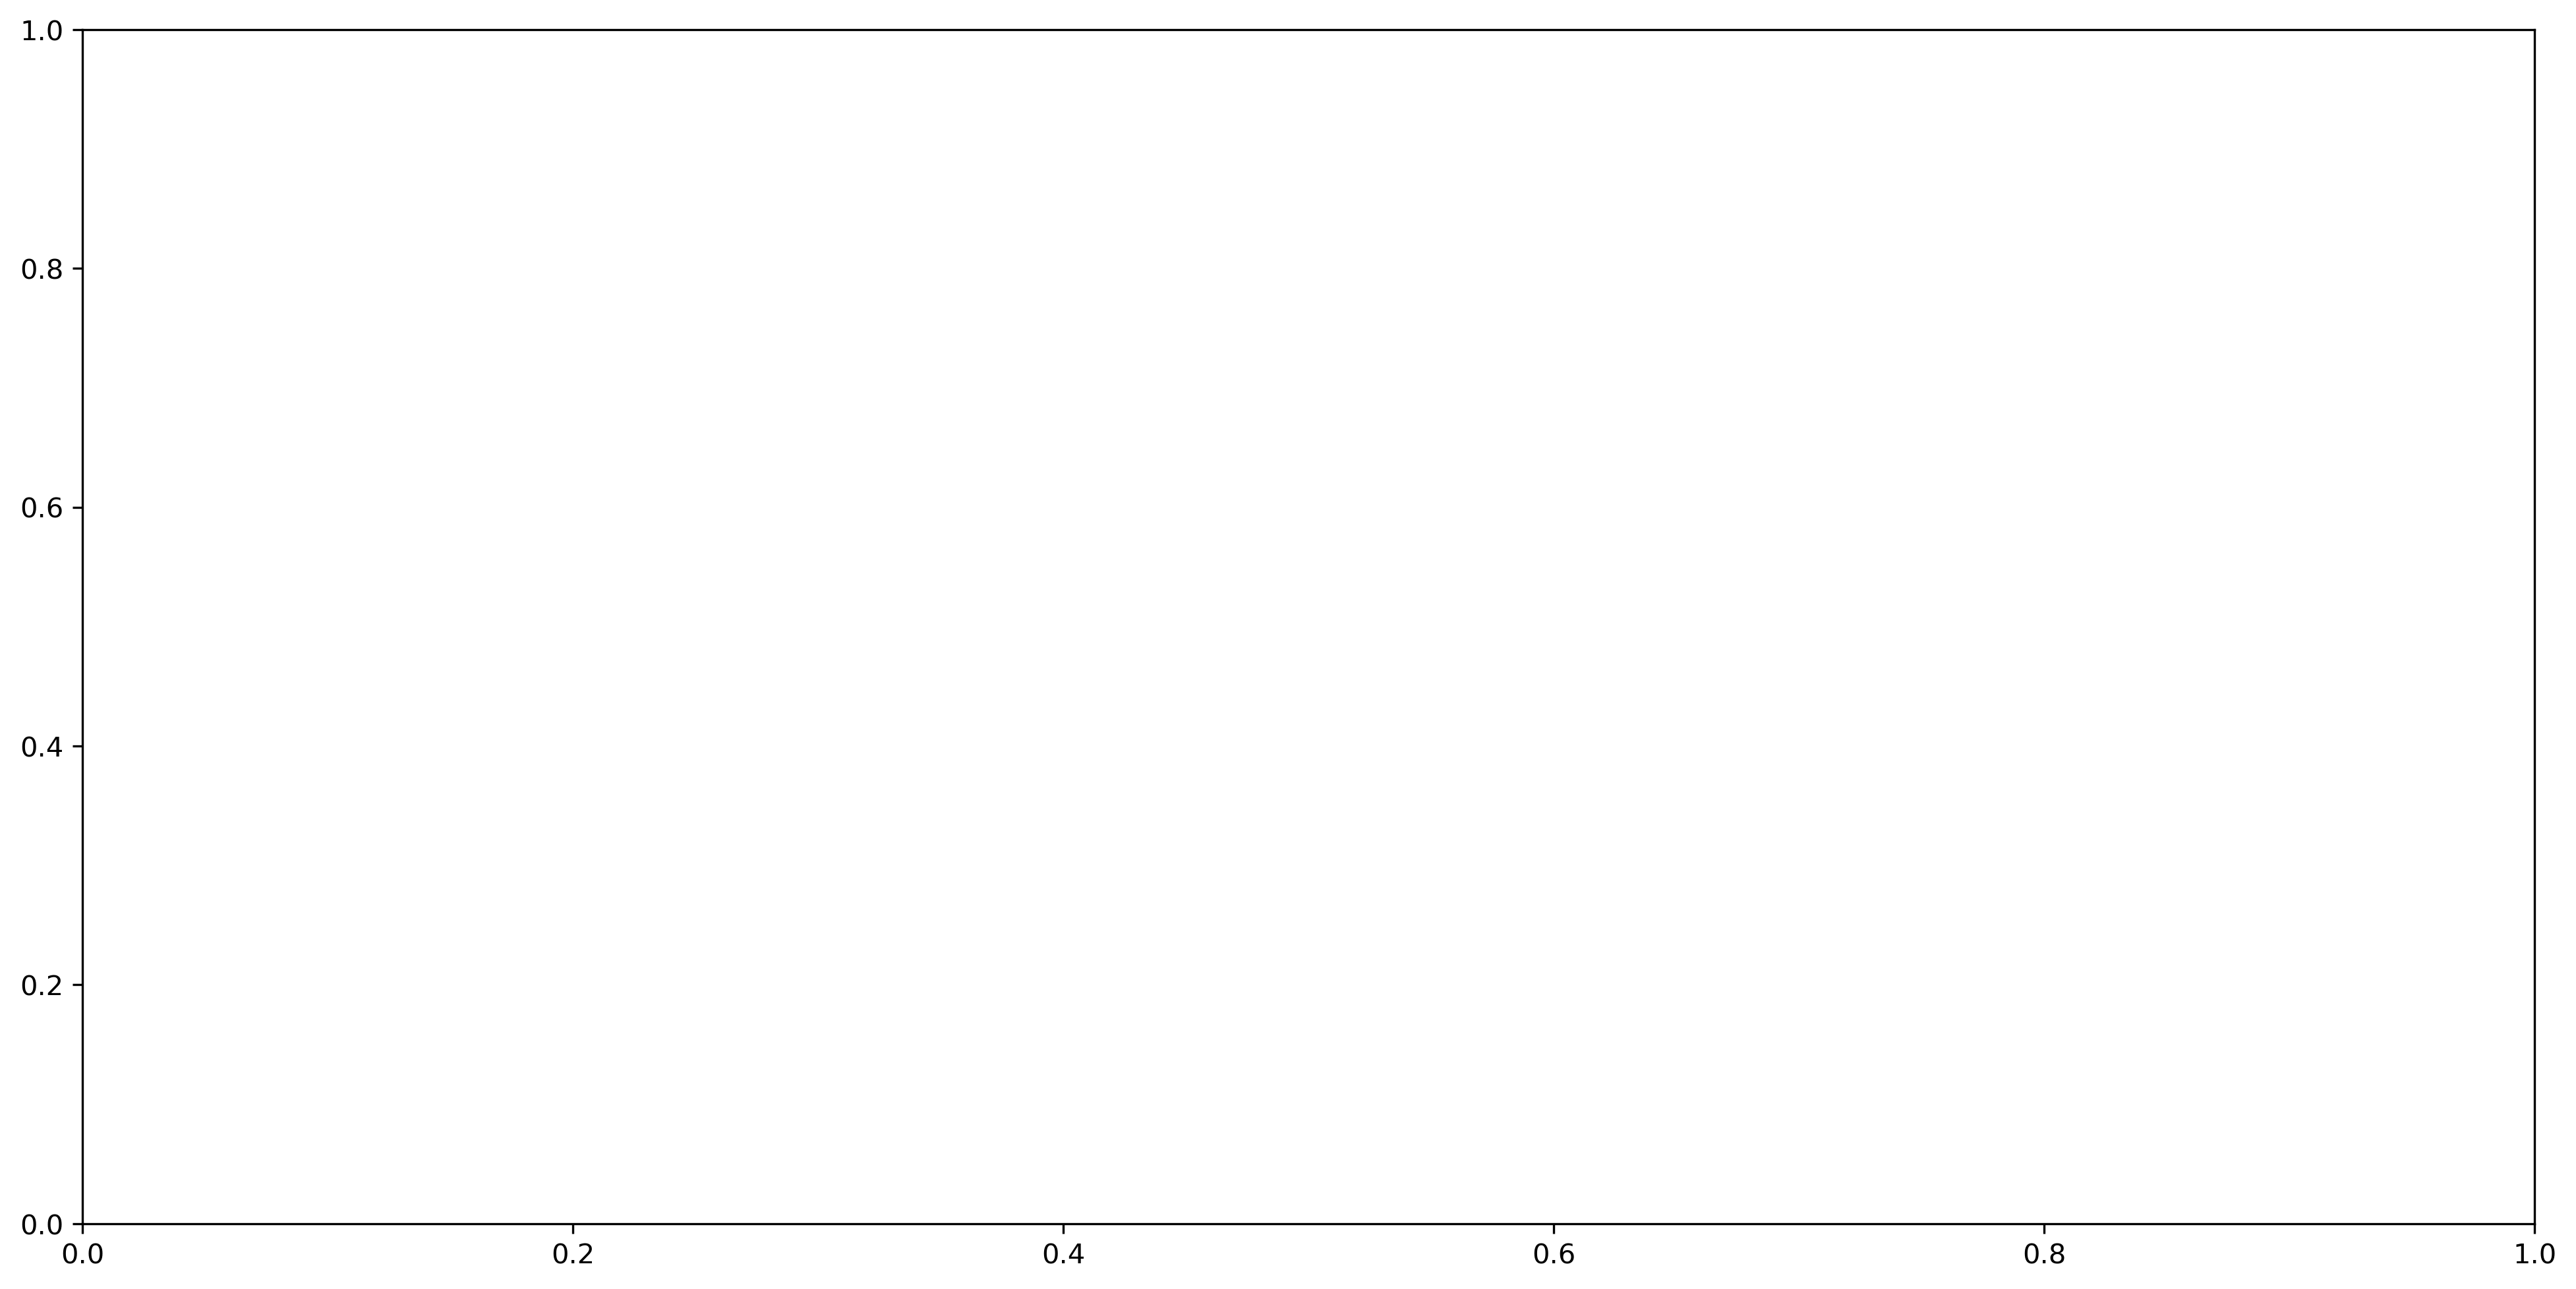

In [10]:
frames = 500
fig, ax = plt.subplots(figsize=(16,8))
def run(i):
  # i = i + 249
  ax.cla()
  ax.set_ylim(-1.5, 1.5)
  m_one = history[0][0][i]
  m_two = history[0][1][i]
  m_three = history[0][2][i]
  m_four = history[0][3][i]
  
  x_one = history[1][0][i]
  x_two = history[1][1][i]
  x_three = history[1][2][i]
  x_four = history[1][3][i]

  c_one = history[2][0][i]
  c_two = history[2][1][i]
  c_three = history[2][2][i]
  c_four = history[2][3][i]

  noise_one = history[3][0][i]
  noise_two = history[3][1][i]
  noise_three = history[3][2][i]
  noise_four = history[3][3][i]
  ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      m_one, m_two, m_three, m_four,
      x_one, x_two, x_three, x_four,
      c_one, c_two, c_three, c_four,
      noise_one, noise_two, noise_three, noise_four,
    ],
    color=[
      "r", "r", "r", "r",
      "g", "g", "g", "g",
      "y", "y", "y", "y", 
      "b", "b", "b", "b"
    ]
  )



In [11]:
anim = animation.FuncAnimation(fig, run, frames=frames, interval=50)
HTML(anim.to_html5_video())

''

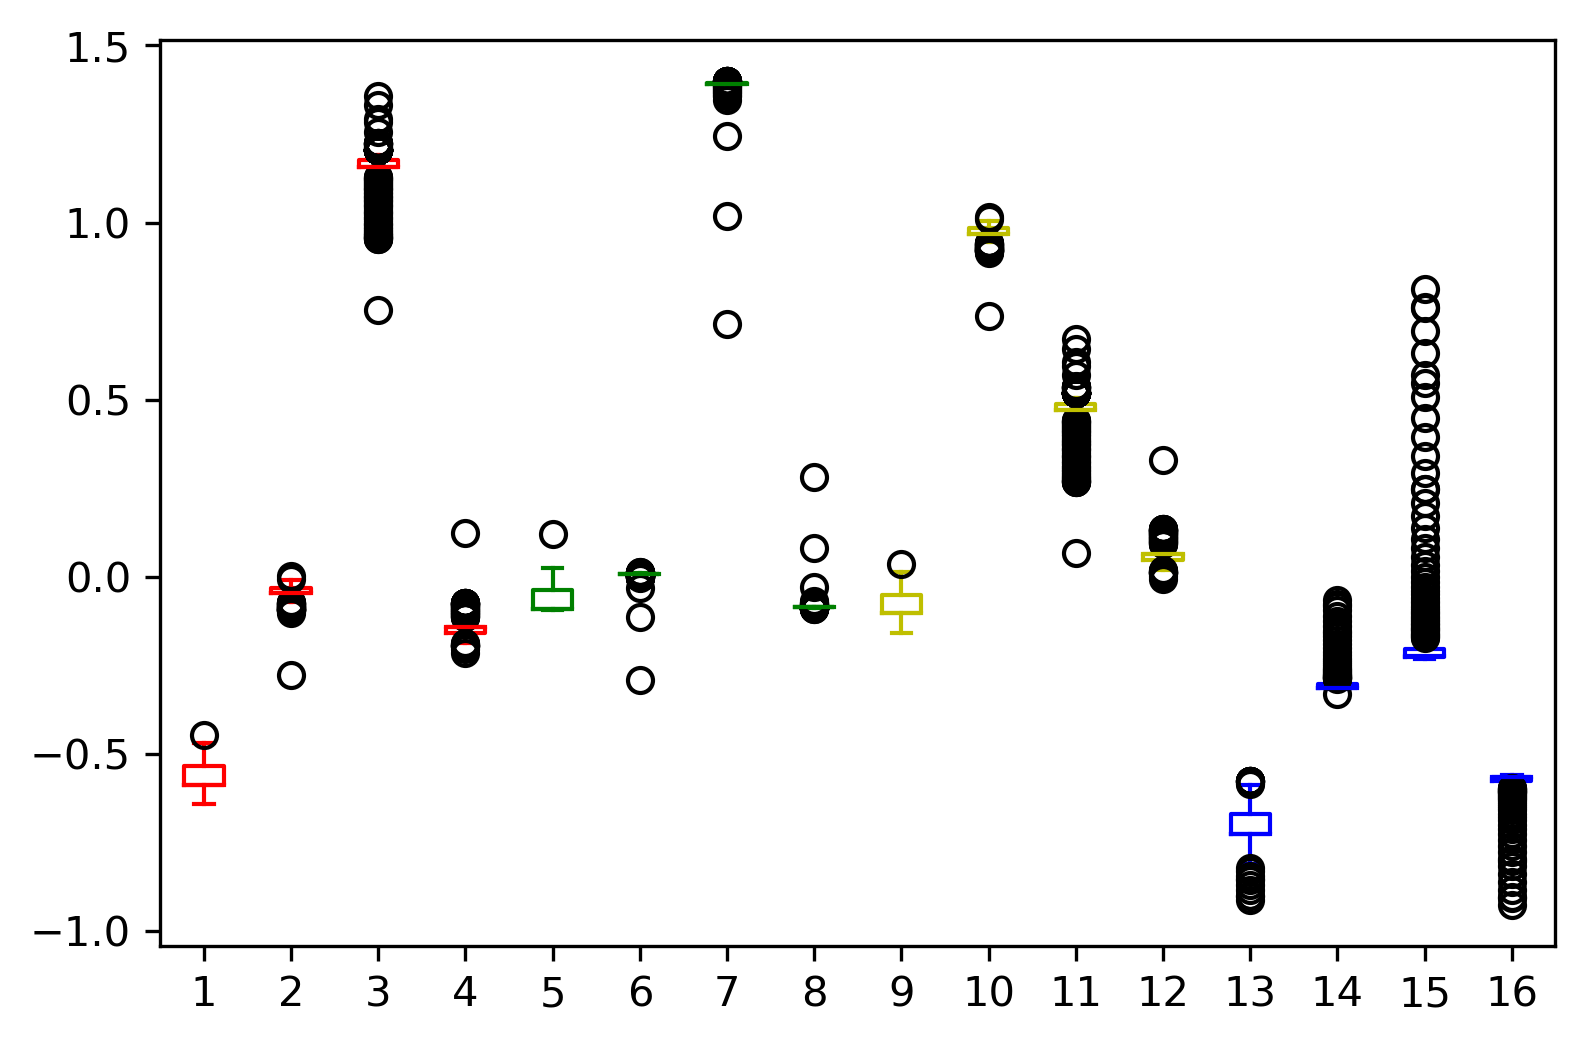

In [12]:
start_index = 0
# Change to start half way

fig, ax = plt.subplots()
m_one = history[0][0][start_index:]
m_two = history[0][1][start_index:]
m_three = history[0][2][start_index:]
m_four = history[0][3][start_index:]

x_one = history[1][0][start_index:]
x_two = history[1][1][start_index:]
x_three = history[1][2][start_index:]
x_four = history[1][3][start_index:]

c_one = history[2][0][start_index:]
c_two = history[2][1][start_index:]
c_three = history[2][2][start_index:]
c_four = history[2][3][start_index:]

noise_one = history[3][0][start_index:]
noise_two = history[3][1][start_index:]
noise_three = history[3][2][start_index:]
noise_four = history[3][3][start_index:]

m_color = {
    "color": "r"
}
x_color = {
    "color": "g"
}
c_color = {
    "color": "y"
}
noise_color = {
    "color": "b"
}

ax.boxplot(
    [m_one, m_two, m_three, m_four],
    positions=[1,2,3,4],
    boxprops=m_color,
    medianprops=m_color,
    whiskerprops=m_color,
    capprops=m_color,
    # showfliers=False
)
ax.boxplot(
    [x_one, x_two, x_three, x_four],
    positions=[5,6,7,8],
    boxprops=x_color,
    medianprops=x_color,
    whiskerprops=x_color,
    capprops=x_color,
    # showfliers=False
)
ax.boxplot(
    [c_one, c_two, c_three, c_four],
    positions=[9,10,11,12],
    boxprops=c_color,
    medianprops=c_color,
    whiskerprops=c_color,
    capprops=c_color,
    # showfliers=False
)
ax.boxplot(
    [noise_one, noise_two, noise_three, noise_four],
    positions=[13,14,15,16],
    boxprops=noise_color,
    medianprops=noise_color,
    whiskerprops=noise_color,
    capprops=noise_color,
    # showfliers=False
)
;

''

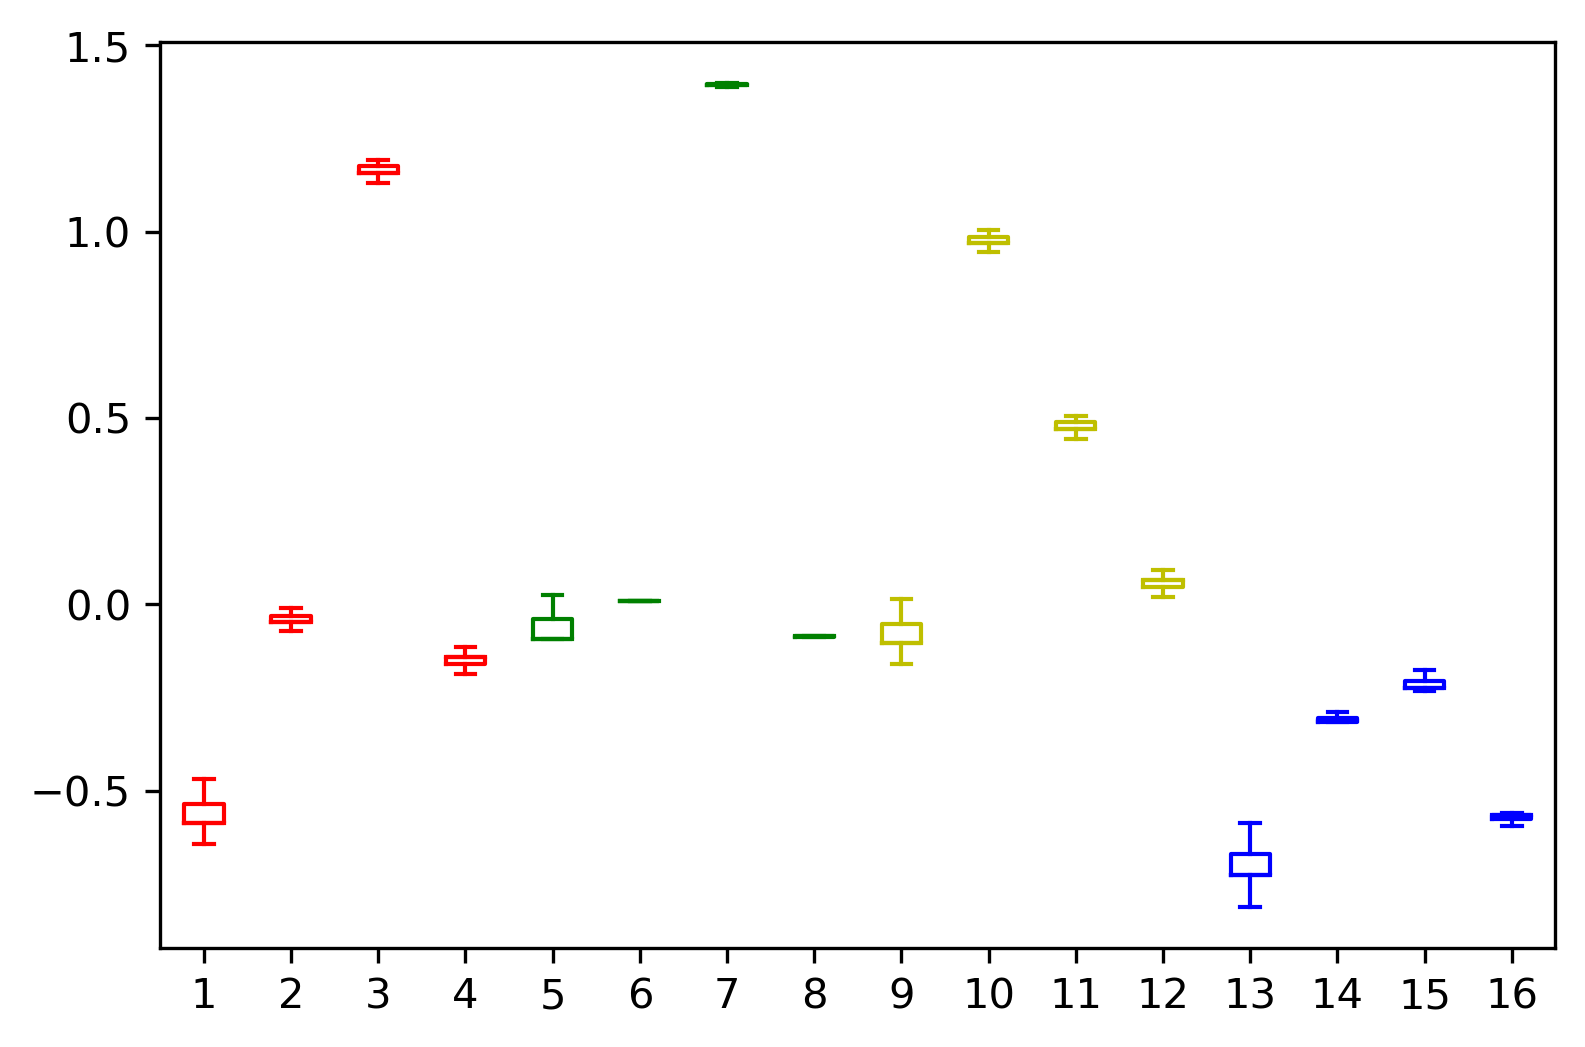

In [13]:
fig, ax = plt.subplots()
ax.boxplot(
    [m_one, m_two, m_three, m_four],
    positions=[1,2,3,4],
    boxprops=m_color,
    medianprops=m_color,
    whiskerprops=m_color,
    capprops=m_color,
    showfliers=False
)
ax.boxplot(
    [x_one, x_two, x_three, x_four],
    positions=[5,6,7,8],
    boxprops=x_color,
    medianprops=x_color,
    whiskerprops=x_color,
    capprops=x_color,
    showfliers=False
)
ax.boxplot(
    [c_one, c_two, c_three, c_four],
    positions=[9,10,11,12],
    boxprops=c_color,
    medianprops=c_color,
    whiskerprops=c_color,
    capprops=c_color,
    showfliers=False
)
ax.boxplot(
    [noise_one, noise_two, noise_three, noise_four],
    positions=[13,14,15,16],
    boxprops=noise_color,
    medianprops=noise_color,
    whiskerprops=noise_color,
    capprops=noise_color,
    showfliers=False
)
;

In [14]:
data = {
    "m_one": m_one,
    "m_two": m_two,
    "m_three": m_three,
    "m_four": m_four,
    "x_one": x_one,
    "x_two": x_two,
    "x_three": x_three,
    "x_four": x_four,
    "c_one": c_one,
    "c_two": c_two,
    "c_three": c_three,
    "c_four": c_four,
    "noise_one": noise_one,
    "noise_two": noise_two,
    "noise_three": noise_three,
    "noise_four": noise_four
}

columns = [
    "m_one",
    "m_two",
    "m_three",
    "m_four",
    "x_one",
    "x_two",
    "x_three",
    "x_four",
    "c_one",
    "c_two",
    "c_three",
    "c_four",
    "noise_one",
    "noise_two",
    "noise_three",
    "noise_four"
]


odf = pd.DataFrame(data)
odf.head(5)

,m_one,m_two,m_three,m_four,x_one,x_two,x_three,x_four,c_one,c_two,c_three,c_four,noise_one,noise_two,noise_three,noise_four
0,-0.446584,-0.277697,0.752939,0.122941,0.120516,-0.290601,0.713764,0.280666,0.036826,0.737318,0.066423,0.329677,-0.727635,-0.331218,0.247787,-0.606760
1,-0.573371,-0.101428,1.059722,-0.078042,-0.005599,-0.114882,1.018497,0.080278,-0.089961,0.913587,0.373205,0.128693,-0.852425,-0.158282,0.547859,-0.803737
2,-0.625529,-0.020517,1.282612,-0.184282,-0.059181,-0.032188,1.245068,-0.028339,-0.142120,0.994498,0.596096,0.022454,-0.901750,-0.081629,0.758450,-0.904203
3,-0.642656,0.001094,1.357298,-0.214569,-0.082768,-0.003480,1.344775,-0.068718,-0.159247,1.016109,0.670781,-0.007834,-0.913704,-0.065875,0.811668,-0.926130
4,-0.636023,-0.005349,1.330701,-0.205180,-0.085654,-0.000326,1.356493,-0.073222,-0.152614,1.009666,0.644185,0.001555,-0.901027,-0.078416,0.760188,-0.907898


In [15]:
m_one_std = odf["m_one"].agg([np.mean, np.std])
m_two_std = odf["m_two"].agg([np.mean, np.std])
m_three_std = odf["m_three"].agg([np.mean, np.std])
m_four_std = odf["m_four"].agg([np.mean, np.std])

noise_one_std = odf["noise_one"].agg([np.mean, np.std])
noise_two_std = odf["noise_two"].agg([np.mean, np.std])
noise_three_std = odf["noise_three"].agg([np.mean, np.std])
noise_four_std = odf["noise_four"].agg([np.mean, np.std])


In [16]:
std_df = odf.std().to_frame()
mean_df = odf.mean().to_frame()
std_df.columns = ["Std"]
mean_df.columns = ["Mean"]
merged_df = pd.merge(std_df, mean_df, left_index=True, right_index=True)

In [17]:
std_df["Std"].loc["m_one"]

0.0353905097690776

''

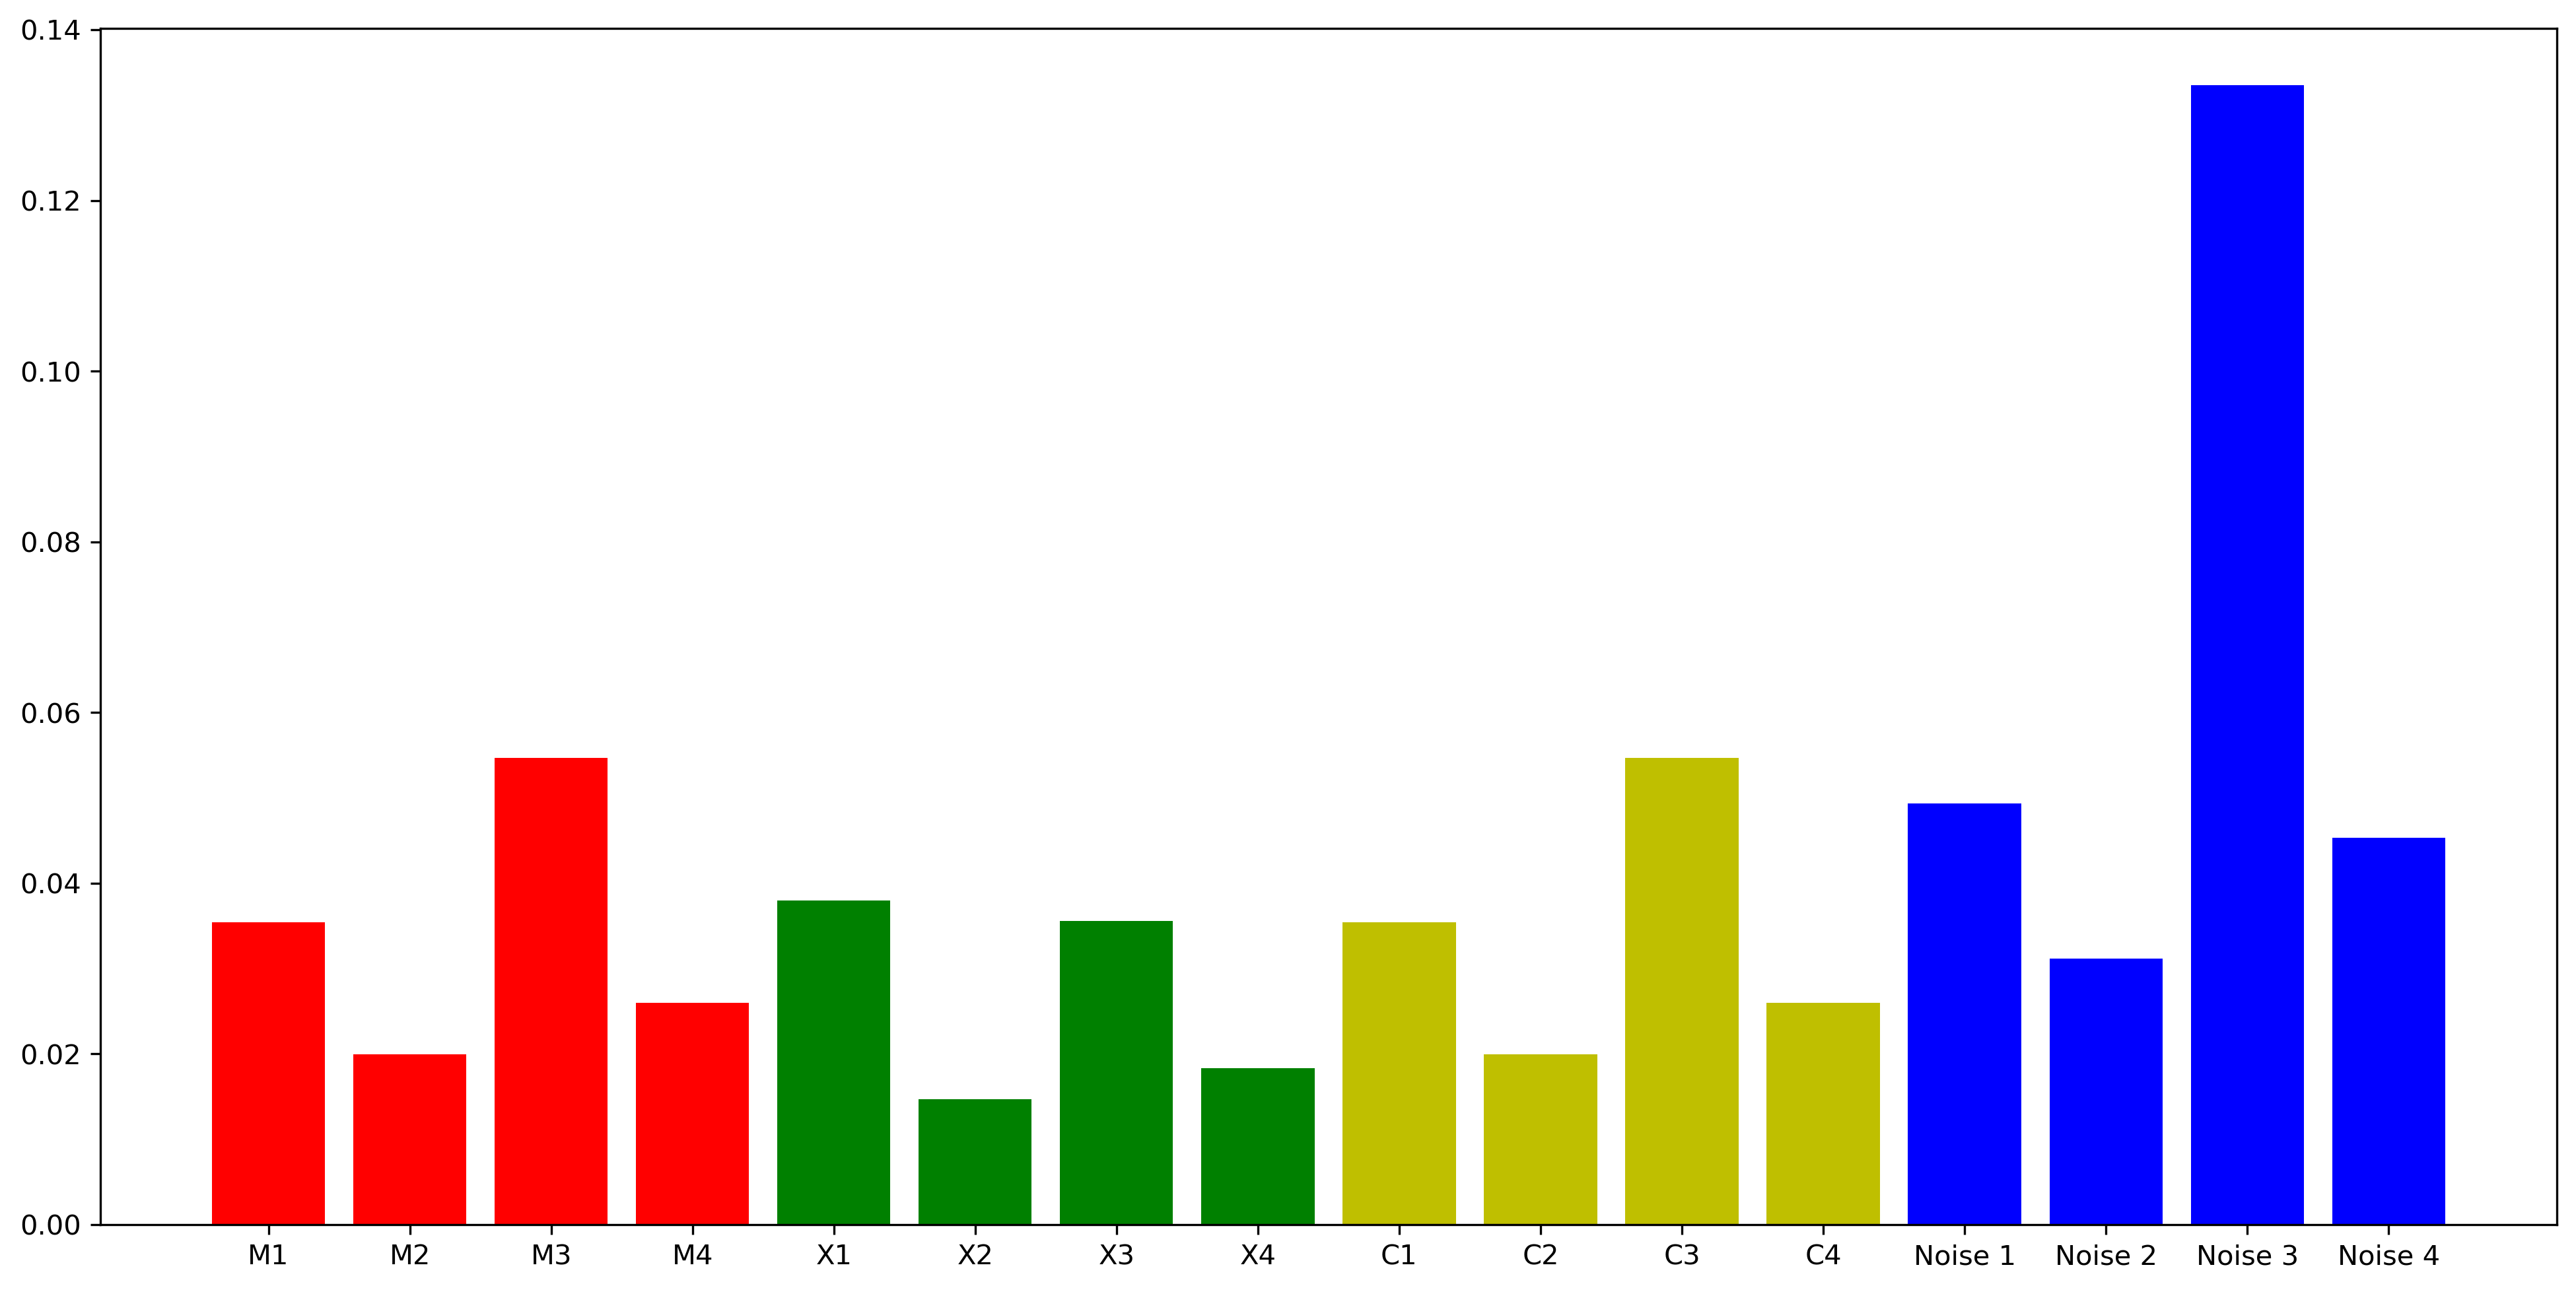

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"],
      std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"],
      std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"],
      std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"],
    ],
    color=[
      "r", "r", "r", "r",
      "g", "g", "g", "g",
      "y", "y", "y", "y", 
      "b", "b", "b", "b"
    ]
)
;

In [19]:
g_ms = sum([std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"]])
g_xs = sum([std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"]])
g_cs = sum([std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"]])
g_noises = sum([std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"]])

''

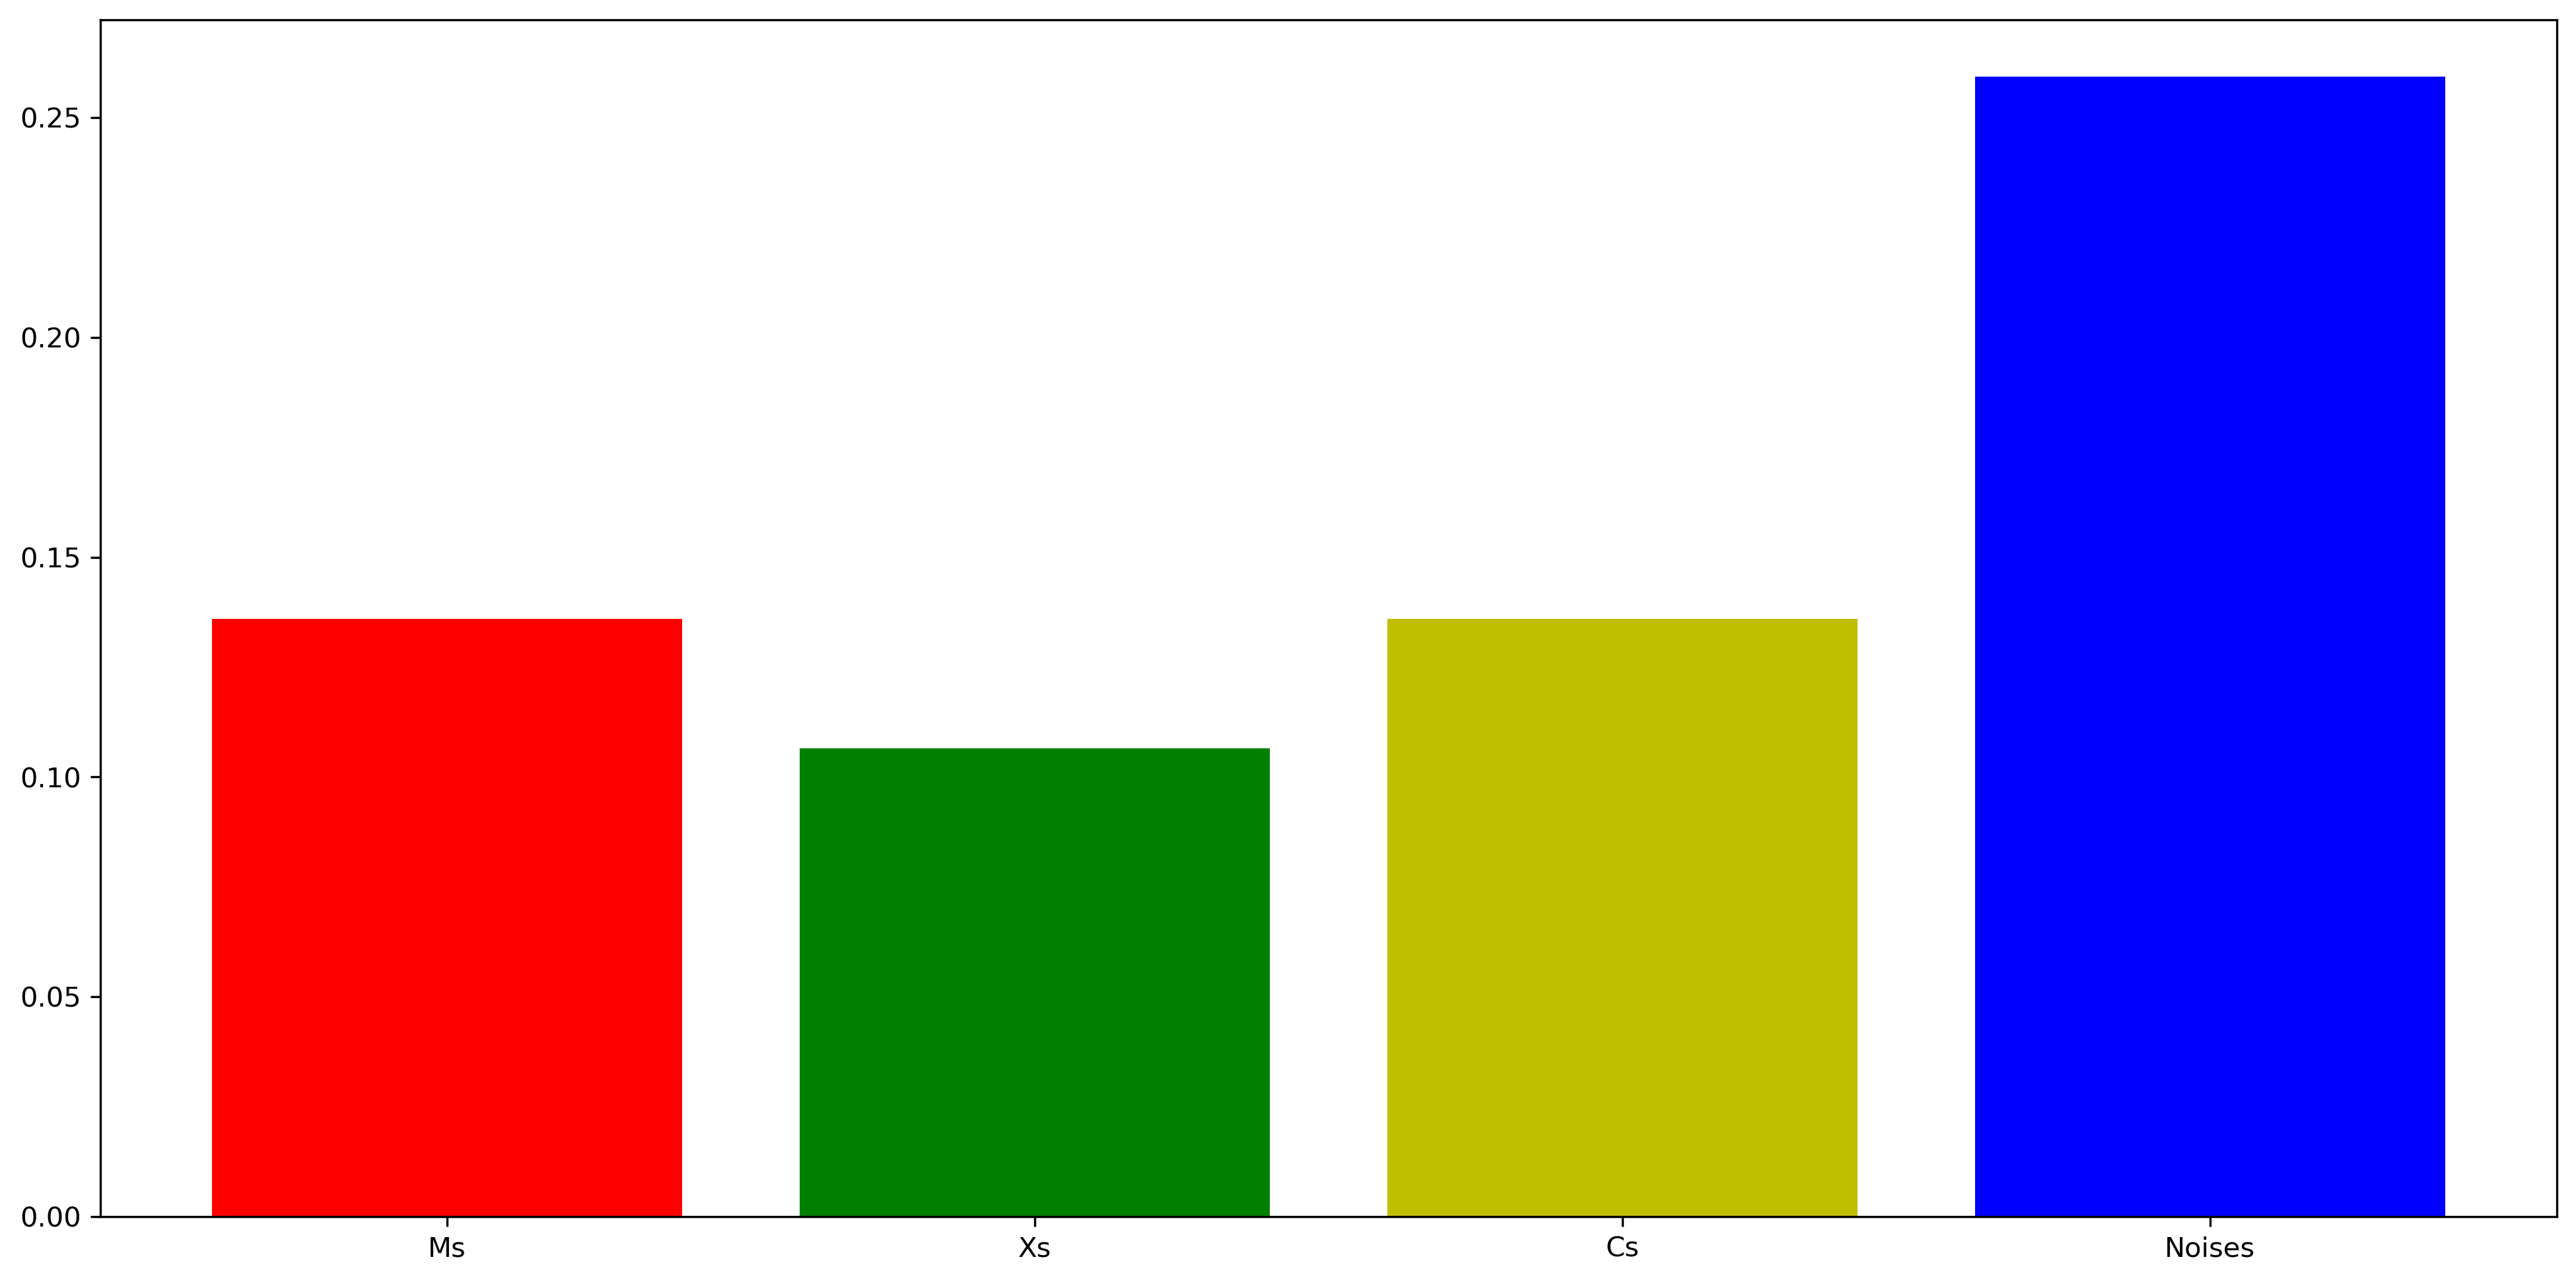

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "Ms", "Xs", "Cs", "Noises"
    ],
    [
      g_ms, g_xs, g_cs, g_noises
    ],
    color=[
      "r", "g", "y", "b"
    ]
)
;

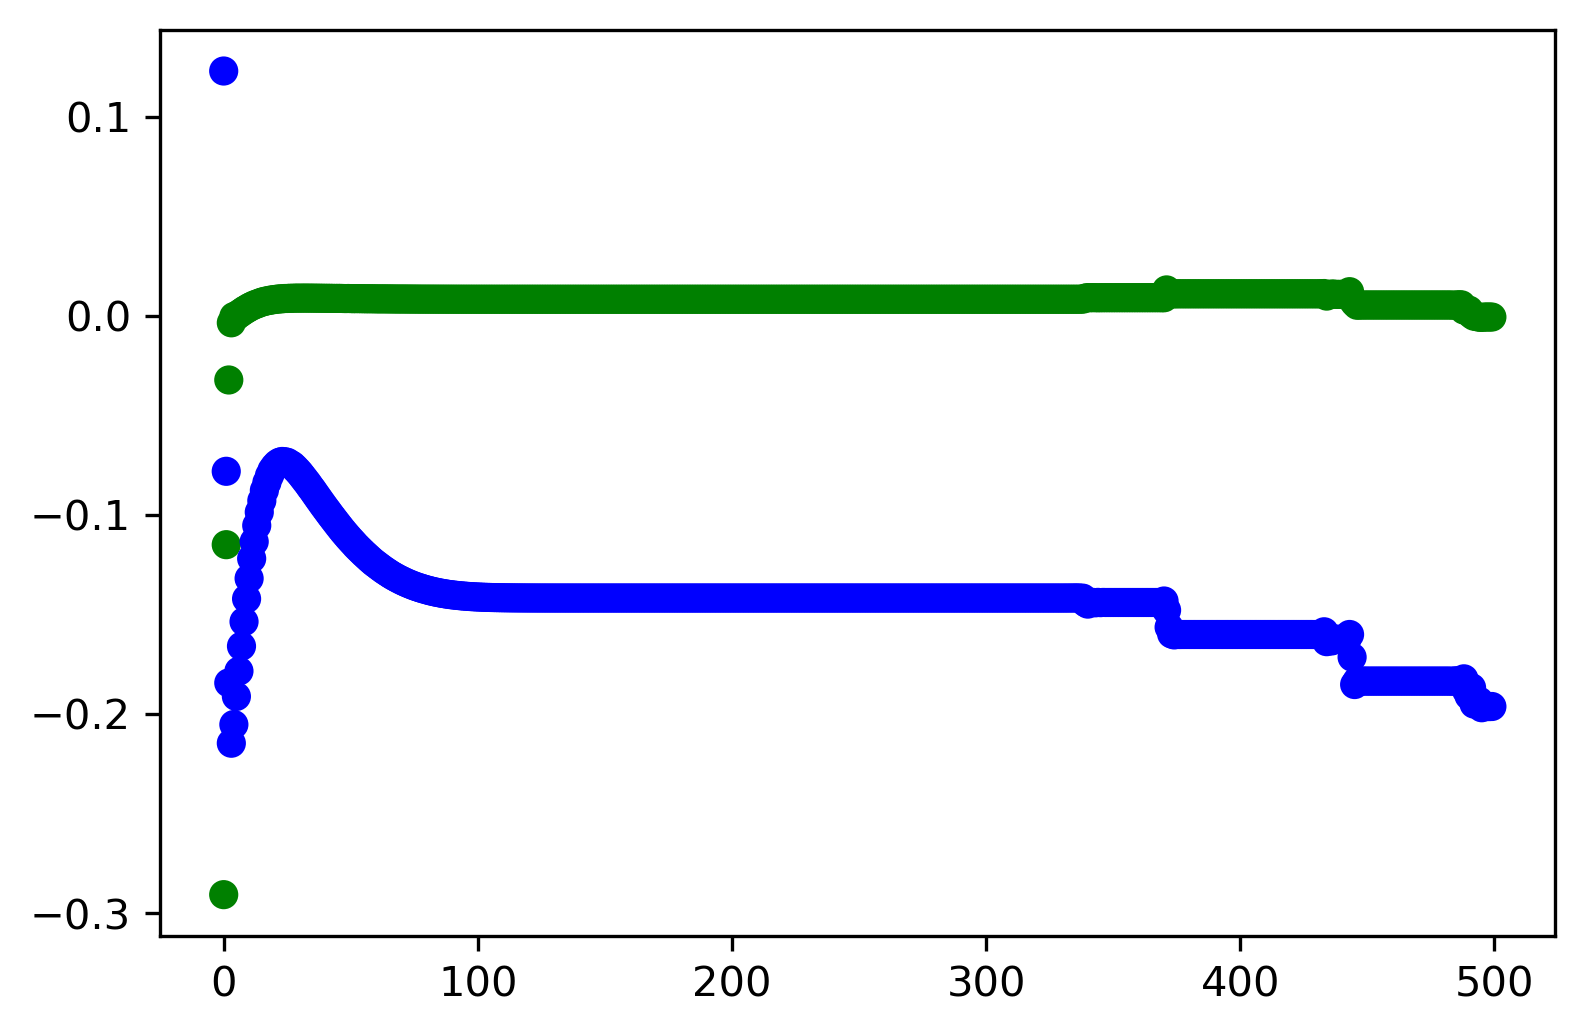

In [49]:
indices = [i for i in range(len(m_three))]
mdf = pd.DataFrame(indices, columns=["Indices"])
m_three_df = pd.DataFrame(m_three, columns=["Readings"])
m_three_df = m_three_df.explode("Readings", ignore_index=True)
mdf["Readings"] = m_three_df["Readings"]
mdf["Bin"] = [0 for _ in range(len(m_three))]

indices = [i for i in range(len(x_two))]
xdf = pd.DataFrame(indices, columns=["Indices"])
x_two_df = pd.DataFrame(x_two, columns=["Readings"])
x_two_df = x_two_df.explode("Readings", ignore_index=True)
xdf["Readings"] = x_two_df["Readings"]
xdf["Bin"] = [1 for _ in range(len(x_two))]

indices = [i for i in range(len(c_three))]
cdf = pd.DataFrame(indices, columns=["Indices"])
c_three_df = pd.DataFrame(c_three, columns=["Readings"])
c_three_df = c_three_df.explode("Readings", ignore_index=True)
cdf["Readings"] = c_three_df["Readings"]
cdf["Bin"] = [2 for _ in range(len(c_three))]

indices = [i for i in range(len(noise_three))]
noisedf = pd.DataFrame(indices, columns=["Indices"])
noise_three_df = pd.DataFrame(noise_three, columns=["Readings"])
noise_three_df = noise_three_df.explode("Readings", ignore_index=True)
noisedf["Readings"] = noise_three_df["Readings"]
noisedf["Bin"] = [3 for _ in range(len(noise_three))]

sdf = pd.concat([mdf, xdf, cdf, noisedf])

colormap = np.array(['r', 'g', 'y', 'b'])
categories = np.array(sdf["Bin"])

scatter = plt.scatter(x=sdf["Indices"], y=sdf["Readings"], c=colormap[categories])